"""

@Author: Naveen Madev Naik</br>
@Date: 2024-10-08</br>
@Last Modified by: Naveen Madev Naik</br>
@Last Modified time: 2024-10-08</br>
@Title:Classification using multinomial logistic regression</br>

"""

1. The data given in the url is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone </br>
calls Often,more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no')</br> subscribed. Build a model to predict whether client will subscribe to term deposit</br>
https://drive.google.com/open?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,recall_score,precision_score,f1_score,auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Loading Data

In [2]:
data_df = pd.read_csv("C:/Users/naikn/OneDrive/Documents/python/Machine_learning/Classification/bank.csv",sep=';')
data_df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
data_df.shape

(4521, 17)

In [4]:
data_df.info

<bound method DataFrame.info of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  dura

In [5]:
data_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Label Encoding

In [6]:
label_encoder =LabelEncoder()



In [7]:
# Encode other categorical features
categorical_cols = data_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'y':  # Exclude the target variable
        data_df[col] = label_encoder.fit_transform(data_df[col])

In [8]:
data_df['y'] = label_encoder.fit_transform(data_df['y'])


In [9]:
data_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [10]:
data_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.411192,1.147755,1.231365,0.016810,1422.657819,0.566025,0.152842,0.652289,15.915284,5.540146,263.961292,2.793630,39.766645,0.542579,2.559168,0.115240
std,10.576211,3.255716,0.599650,0.748744,0.128575,3009.638142,0.495676,0.359875,0.901498,8.247667,3.002763,259.856633,3.109807,100.121124,1.693562,0.992051,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,9.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,444.000000,1.000000,0.000000,0.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,2.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,87.000000,11.000000,2.000000,3.000000,1.000000,71188.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3025.000000,50.000000,871.000000,25.000000,3.000000,1.000000


### Correlation Matrix

In [11]:
correlation_matrix = data_df.iloc[:, :-1].corr()

print(correlation_matrix)

                age       job   marital  education   default   balance  \
age        1.000000 -0.021500 -0.381485  -0.121613 -0.017885  0.083820   
job       -0.021500  1.000000  0.069390   0.170160  0.008324  0.009797   
marital   -0.381485  0.069390  1.000000   0.102714 -0.020745  0.024971   
education -0.121613  0.170160  0.102714   1.000000 -0.010534  0.057725   
default   -0.017885  0.008324 -0.020745  -0.010534  1.000000 -0.070886   
balance    0.083820  0.009797  0.024971   0.057725 -0.070886  1.000000   
housing   -0.193888 -0.128353 -0.029851  -0.087070  0.006881 -0.050227   
loan      -0.011250 -0.040245 -0.045210  -0.054086  0.063994 -0.071349   
contact    0.015161 -0.074068 -0.068236  -0.110554  0.008448 -0.009665   
day       -0.017853  0.012865  0.008794   0.014926 -0.013261 -0.008677   
month     -0.040714 -0.096613 -0.035855  -0.050086  0.014297  0.023113   
duration  -0.002367 -0.006739  0.006619  -0.014878 -0.011615 -0.015950   
campaign  -0.005148 -0.002739  0.00591

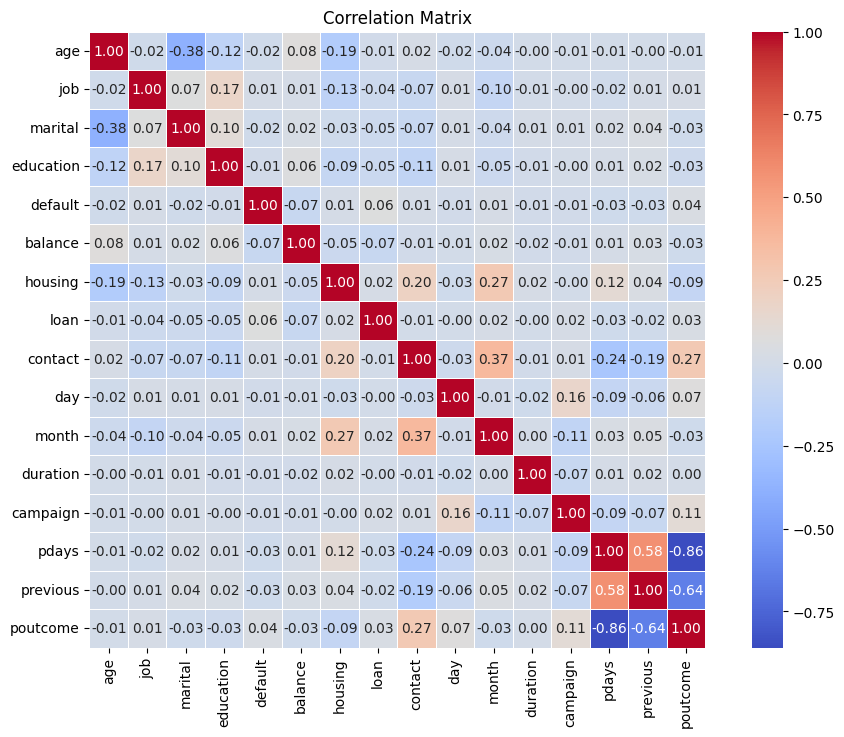

In [12]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f', cmap='coolwarm',square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [13]:
x = data_df.drop(['y'],axis=1)
y = data_df['y']

### Scaling Data

In [14]:
scaler=StandardScaler()

data_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=41)

### Model Fitting

In [16]:
# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the model to the training data
model.fit(x_train, y_train)

c:\Users\naikn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\naikn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [17]:
# Make predictions on the test set
y_pred = model.predict(x_test)

### Confusion Matrix

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1168   23]
 [ 139   27]]


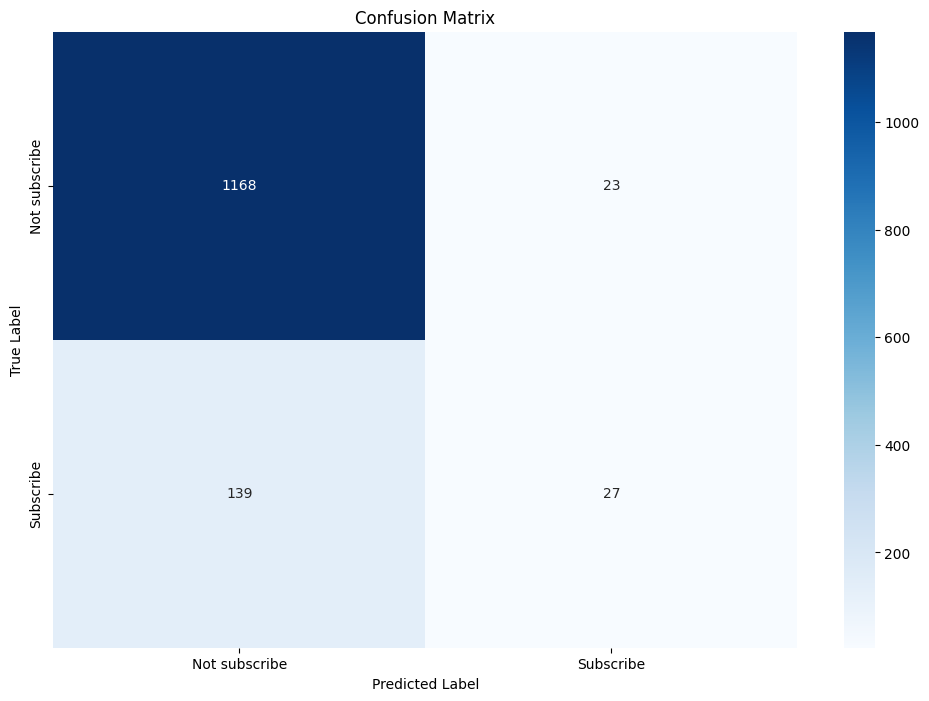

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not subscribe','Subscribe'], 
            yticklabels=['Not subscribe','Subscribe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.88
Precision: 0.54
Recall: 0.16
F1 Score: 0.25


ROC curve

In [21]:
y_prob= model.predict_proba(x_test)[:,1]
print(y_prob)

false_positive_rate ,true_positive_rate,threshold =roc_curve(y_test,y_prob)
print(threshold)
roc_auc =auc(false_positive_rate,true_positive_rate)
print(roc_auc)

[0.04564473 0.09772926 0.25331902 ... 0.04419068 0.08384354 0.4487723 ]
[           inf 9.91575828e-01 9.81013262e-01 9.74132221e-01
 9.57811709e-01 9.43241369e-01 9.30264168e-01 9.17093533e-01
 8.76731284e-01 8.74649535e-01 7.96924061e-01 7.15807067e-01
 7.14239993e-01 6.93389877e-01 6.87833221e-01 6.80728083e-01
 6.07308117e-01 5.94070780e-01 5.90434085e-01 5.75915806e-01
 5.71000811e-01 5.56499660e-01 5.41253027e-01 5.21087877e-01
 5.18169397e-01 5.16419083e-01 5.14233825e-01 5.10668035e-01
 5.08409499e-01 5.01613203e-01 4.86909519e-01 4.74683818e-01
 4.73233714e-01 4.72800955e-01 4.69274417e-01 4.55935443e-01
 4.55130236e-01 4.48824024e-01 4.48772300e-01 4.42166806e-01
 4.42090544e-01 4.38950535e-01 4.37617981e-01 4.05634182e-01
 4.01384616e-01 4.00800351e-01 3.90778339e-01 3.84587107e-01
 3.80584110e-01 3.67148681e-01 3.62057271e-01 3.59879898e-01
 3.58599506e-01 3.50944577e-01 3.50843830e-01 3.42332895e-01
 3.36392113e-01 3.29497285e-01 3.24569530e-01 3.19658734e-01
 3.07945068e-

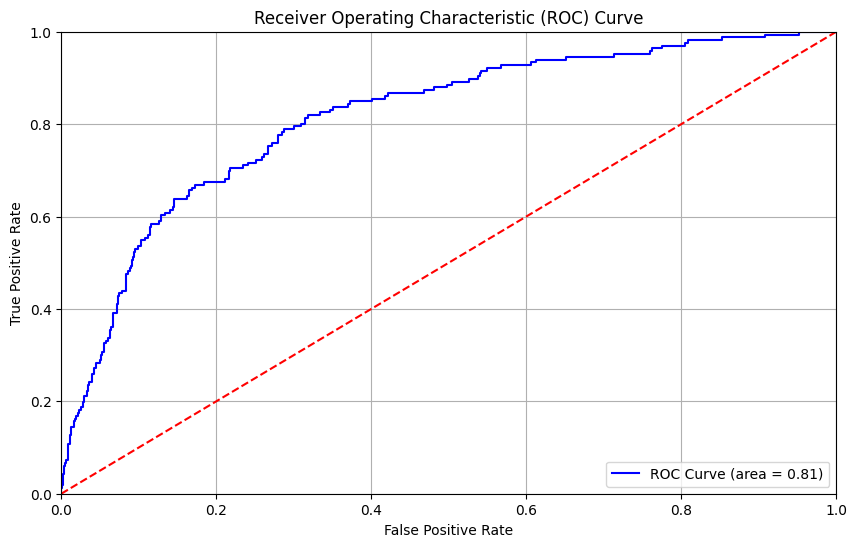

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()